<a href="https://colab.research.google.com/github/jonatangraversen01-lab/AI-in-Transport/blob/main/Project_feature_engineering_with_advanced_ITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
import pandas as pd

url = "https://raw.githubusercontent.com/zhenliangma/Applied-AI-in-Transportation/master/ProjectAssignmentData/Dataset-PT.csv"
df = pd.read_csv(url, skiprows=1)

df.head(15)

,Calendar_date,route_id,bus_id,stop_sequence,arrival_delay,dwell_time,travel_time_for_previous_section,scheduled_travel_time,upstream_stop_delay,origin_delay,...,factor(weather)Rain,factor(weather)Snow,factor(temperature)Cold,factor(temperature)Extra_cold,factor(temperature)Normal,factor(day_of_week)weekday,factor(day_of_week)weekend,factor(time_of_day)Afternoon_peak,factor(time_of_day)Morning_peak,factor(time_of_day)Off-peak
0,20220108,4,41344,1,151,0,0,120,100,100,...,0,0,0,0,1,0,1,0,0,1
1,20220108,4,41344,2,185,24,171,45,151,100,...,0,0,0,0,1,0,1,0,0,1
2,20220108,4,41344,3,186,0,55,41,185,100,...,0,0,0,0,1,0,1,0,0,1
3,20220108,4,41344,4,202,12,42,94,186,100,...,0,0,0,0,1,0,1,0,0,1
4,20220108,4,41344,5,242,21,98,86,202,100,...,0,0,0,0,1,0,1,0,0,1
5,20220108,4,41344,6,260,13,105,38,242,100,...,0,0,0,0,1,0,1,0,0,1
6,20220108,4,41344,7,278,12,43,79,260,100,...,0,0,0,0,1,0,1,0,0,1
7,20220108,4,41344,8,272,8,85,97,278,100,...,0,0,0,0,1,0,1,0,0,1
8,20220108,4,41344,9,292,24,83,47,272,100,...,0,0,0,0,1,0,1,0,0,1
9,20220108,4,41344,10,351,9,43,85,292,100,...,0,0,0,0,1,0,1,0,0,1


In [15]:
df = df.drop(["Calendar_date", "route_id", "bus_id", "factor(weather)Snow"], axis=1)

In [16]:
#df['rain_x_traffic'] = df['factor(weather)Rain'] * df['traffic_condition']
df['peak_x_dwell'] = df['factor(time_of_day)Morning_peak'] * df['dwell_time']
df['rain_and_cold'] = df['factor(weather)Rain'] * df['factor(temperature)Cold']
#df['snow_and_peak'] = df['factor(weather)Snow'] * df['factor(time_of_day)Morning_peak']

In [17]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
corr_matrix['arrival_delay'].sort_values(ascending=False)

,arrival_delay
arrival_delay,1.000000
upstream_stop_delay,0.975019
origin_delay,0.716324
previous_bus_delay,0.265434
factor(day_of_week)weekend,0.190783
factor(time_of_day)Off-peak,0.138109
stop_sequence,0.092616
dwell_time,0.089433
travel_time_for_previous_section,0.081113
factor(weather)Normal,0.022642


In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Features (X) and target (y)
X = df.drop(columns=['arrival_delay'])
y = df['arrival_delay']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Drop raw string categorical columns
cols_to_drop = ['weather', 'temperature', 'day_of_week', 'time_of_day']
X_train = X_train.drop(columns=cols_to_drop)
X_test  = X_test.drop(columns=cols_to_drop)

# Create and fit the model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

n = len(y_test)

# Number of predictors (features in your model)
p = X.shape[1]   # if X is your features dataframe/array

# Step 2: Calculate Adjusted R²
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print(f"Adjusted R²: {adj_r2}")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Adjusted R²: 0.9893738670445071
Mean Absolute Error: 12.587653195330851
Mean Squared Error: 397.22626334635083
R-squared: 0.9893765961925787


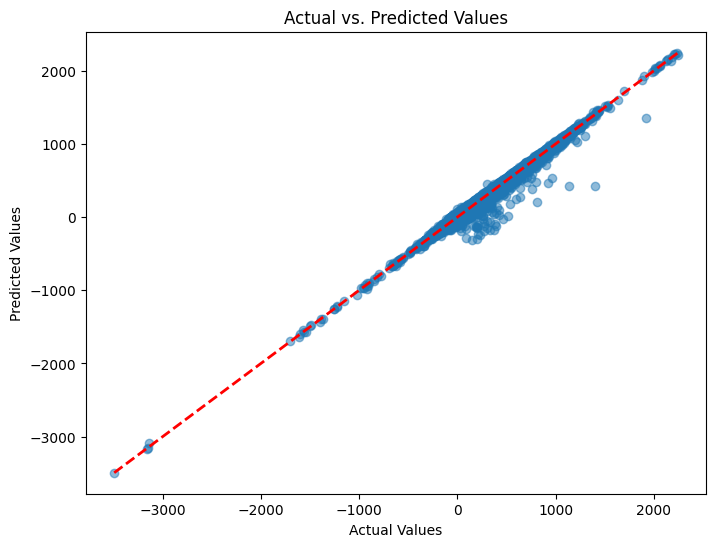

In [20]:
import matplotlib.pyplot as plt

# y_test contains the actual target values for the test dataset
# y_pred contains the predicted values for the test dataset

# Create a scatter plot to visualize the relationship
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.5)  # Plot actual vs. predicted values

# Add labels and title
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', lw=2)

# Show the plot
plt.show()

In [21]:
new_data = pd.DataFrame([{
    'stop_sequence': 2,
    "upstream_stop_delay": 151,
    "previous_bus_delay": 198,
    "previous_trip_travel_time": 47,
    "travel_time_for_previous_section": 171,
    'dwell_time': 24,
    'scheduled_travel_time': 45,
    'origin_delay': 17,
    'traffic_condition': 47,
    'recurrent_delay': 42.3,
    'factor(weather)Light_Rain': 0,
    'factor(weather)Light_Snow': 1,
    'factor(weather)Normal': 0,
    'factor(weather)Rain': 0,
    'factor(weather)Snow': 0,
    'factor(temperature)Cold': 0,
    'factor(temperature)Extra_cold': 0,
    'factor(temperature)Normal': 1,
    'factor(day_of_week)weekday': 0,
    'factor(day_of_week)weekend': 1,
    'factor(time_of_day)Afternoon_peak': 0,
    'factor(time_of_day)Morning_peak': 0,
    'factor(time_of_day)Off-peak': 1
}])

In [22]:
new_data = new_data.reindex(columns=X_train.columns, fill_value=0)
predicted_delay = model.predict(new_data)
print("Predicted arrival delay (seconds):", predicted_delay[0])

Predicted arrival delay (seconds): 175.09708700166786


In [23]:
# Copy the current stop row
next_stop = new_data.copy()

# Increment the stop sequence
next_stop['stop_sequence'] = next_stop['stop_sequence'] + 1

# Make sure columns match your training data
predicted_next_delay = model.predict(next_stop[X_train.columns].values)[0]

print("Predicted arrival delay at the next stop:", predicted_next_delay)

Predicted arrival delay at the next stop: 175.0396792499171


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [24]:
results = pd.DataFrame({
    'stop_sequence': [new_data['stop_sequence'].values[0], next_stop['stop_sequence'].values[0]],
    'predicted_delay': [model.predict(new_data[X_train.columns].values)[0], predicted_next_delay]
})

print(results)

   stop_sequence  predicted_delay
0              2       175.097087
1              3       175.039679


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [25]:
import pandas as pd

def predict_next_stops(model, start_row, feature_columns, n_stops=5):
    """
    Predict arrival delays for the next n_stops using the given model.

    Parameters:
        model: trained XGBoost model
        start_row: DataFrame with one row (the current stop's feature values)
        feature_columns: list of features used in training (X_train.columns)
        n_stops: number of stops ahead to predict

    Returns:
        DataFrame with stop_sequence and predicted delays
    """
    results = []

    # Start with the current stop
    current_stop = start_row.copy()

    for i in range(n_stops):
        # Predict current stop's delay
        predicted_delay = model.predict(current_stop[feature_columns].values)[0]

        # Save result
        results.append({
            "stop_sequence": current_stop["stop_sequence"].values[0],
            "predicted_delay": predicted_delay
        })

        # Prepare next stop
        next_stop = current_stop.copy()
        next_stop["stop_sequence"] = current_stop["stop_sequence"] + 1

        # If you had previous delay info, you could use it here:
        # next_stop["origin_delay"] = predicted_delay
        # next_stop["upstream_stop_delay"] = predicted_delay

        # Keep other features constant (you can modify this part later if you have dynamics)
        current_stop = next_stop.copy()

    return pd.DataFrame(results)

In [26]:
predicted_trip = predict_next_stops(
    model=model,
    start_row=new_data,
    feature_columns=X_train.columns,
    n_stops=10  # predict next 5 stops
)

print(predicted_trip)

   stop_sequence  predicted_delay
0              2       175.097087
1              3       175.039679
2              4       174.982271
3              5       174.924864
4              6       174.867456
5              7       174.810048
6              8       174.752640
7              9       174.695233
8             10       174.637825
9             11       174.580417


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/